In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [106]:
#dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')
dat=pd.read_csv("D:/Second_paper_data/COVID-EMDA-master/data_release/nyiso/dat_nyc_2019_2020_week_year_group.csv")

In [107]:
dat.head()

,Unnamed: 0,year,week,date,X00.00,X01.00,X02.00,X03.00,X04.00,X05.00,...,X16.00,X17.00,X18.00,X19.00,X20.00,X21.00,X22.00,X23.00,total_load,month
0,1,2019,Friday,2019-07-01,5181.963462,4945.388462,4789.888462,4707.561538,4718.890385,4935.092308,...,6827.540385,6836.746154,6648.184615,6480.098077,6304.832692,6112.942308,5840.076923,5518.536538,144274.551923,6.519231
1,2,2019,Monday,2019-07-04,5138.046154,4933.375000,4794.546154,4729.655769,4758.605769,4982.432692,...,6969.892308,7000.711538,6845.834615,6719.201923,6566.711538,6356.413462,6016.209615,5611.515385,146438.392308,6.615385
2,3,2019,Saturday,2019-07-02,5203.394231,4969.634615,4805.932692,4703.732692,4660.394231,4702.223077,...,6046.763462,6084.353846,6074.003846,6017.013462,5948.155769,5843.782692,5663.559615,5422.280769,132935.705769,6.538462
3,4,2019,Sunday,2019-07-03,5158.753846,4941.667308,4779.623077,4674.801923,4625.828846,4644.840385,...,6093.296154,6164.830769,6170.875000,6149.186538,6100.303846,5983.400000,5746.596154,5428.986538,132244.069231,6.576923
4,5,2019,Thursday,2019-06-30,5281.326923,5032.665385,4873.607692,4794.701923,4805.192308,5020.342308,...,6928.746154,6944.613462,6773.790385,6625.463462,6447.248077,6225.392308,5905.525000,5527.757692,146512.496154,6.461538


<ipython-input-109-73698a3e4815>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat2['Time']=idx
<ipython-input-109-73698a3e4815>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat2['Time']=idx
<ipython-input-109-73698a3e4815>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

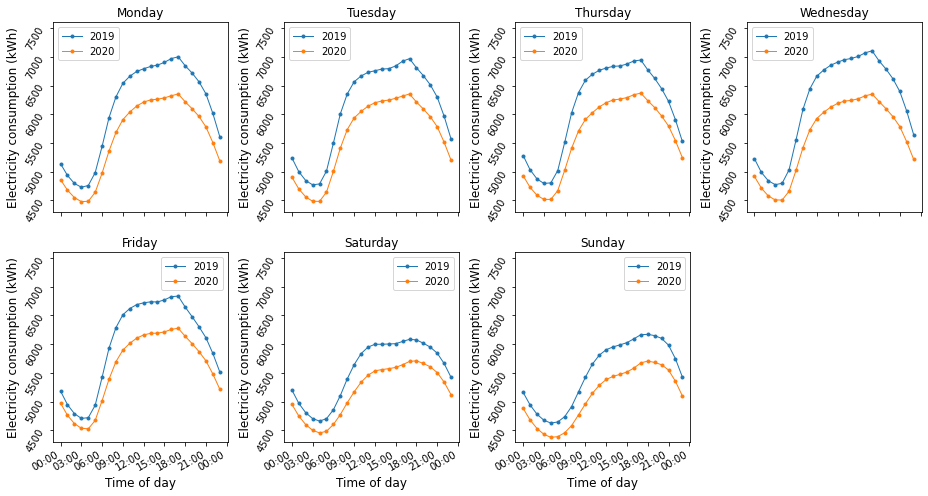

In [109]:
titles=['Monday','Tuesday','Thursday','Wednesday','Friday','Saturday','Sunday']
labels=[1,2,3,4,5,6,7]
idx=pd.date_range("2019-01-01 00:00", "2019-01-01 23:30", freq = "60min")
#fig, ax = plt.subplots(nrows=3, ncols=2)
#fig.set_size_inches(20,15)
hours = mdates.HourLocator(interval = 3)
h_fmt = mdates.DateFormatter('%H:%M')
fig = plt.figure()
fig.set_size_inches(13,7)
for c,num in zip(labels, range(1,8)):
    df=dat[dat['week']==titles[c-1]]
    dat1=df.T
    dat1.columns=[df.T.loc['year'].reset_index(drop=True)[0],df.T.loc['year'].reset_index(drop=True)[1]]
    dat2=dat1.iloc[4:28,:]
    dat2['Time']=idx
    ax = fig.add_subplot(2,4,num)
    ax.plot(dat2['Time'], dat2[2019], linewidth = 1,marker='o',markersize=3,label="2019")
    ax.plot(dat2['Time'], dat2[2020], linewidth = 1,marker='o',markersize=3,label="2020")
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(h_fmt)
    ax.legend( loc = 'best',prop={ 'size':10})
    ax.set_title(titles[c-1])
    ax.tick_params(labelrotation=60)
    fig.autofmt_xdate()
    plt.xlabel('Time of day',fontdict={'size':12})
    plt.ylabel('Electricity consumption (kWh)',fontsize=12)
    ax.set_ylim(4300,7600)
    
#fig.suptitle('Intra-day electricity usage in Las',fontsize=18)
plt.tight_layout()
#fig.subplots_adjust(top=0.95)
plt.show()